# אתגר: ניתוח טקסט על מדע הנתונים

בדוגמה זו, נעשה תרגיל פשוט שמכסה את כל השלבים בתהליך המסורתי של מדע הנתונים. אין צורך לכתוב קוד, אפשר פשוט ללחוץ על התאים למטה כדי להפעיל אותם ולצפות בתוצאה. כאתגר, מומלץ לנסות את הקוד הזה עם נתונים שונים.

## מטרה

בשיעור זה, דיברנו על מושגים שונים הקשורים למדע הנתונים. בואו ננסה לגלות מושגים נוספים על ידי ביצוע **כריית טקסט**. נתחיל עם טקסט על מדע הנתונים, נחלץ ממנו מילות מפתח, ואז ננסה להמחיש את התוצאה.

כטקסט, אשתמש בדף על מדע הנתונים מוויקיפדיה:


In [62]:
url = 'https://en.wikipedia.org/wiki/Data_science'

## שלב 1: השגת הנתונים

השלב הראשון בכל תהליך מדעי נתונים הוא השגת הנתונים. נשתמש בספריית `requests` כדי לעשות זאת:


In [63]:
import requests

text = requests.get(url).content.decode('utf-8')
print(text[:1000])

<!DOCTYPE html>
<html class="client-nojs" lang="en" dir="ltr">
<head>
<meta charset="UTF-8"/>
<title>Data science - Wikipedia</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"1a104647-90de-485a-b88a-1406e889a5d1","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"Data_science","wgTitle":"Data science","wgCurRevisionId":1038046078,"wgRevisionId":1038046078,"wgArticleId":35458904,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["CS1 maint: others","Articles with short description","Short description matches Wikidata","Use dmy dates from December 2012","Information science","Computer occupations"

## שלב 2: עיבוד הנתונים

השלב הבא הוא להמיר את הנתונים לצורה המתאימה לעיבוד. במקרה שלנו, הורדנו את קוד המקור של ה-HTML מהדף, ואנו צריכים להמיר אותו לטקסט פשוט.

ישנן דרכים רבות לבצע זאת. אנו נשתמש באובייקט הפשוט ביותר המובנה ב-[HTMLParser](https://docs.python.org/3/library/html.parser.html) של פייתון. עלינו לרשת את המחלקה `HTMLParser` ולהגדיר את הקוד שיאסוף את כל הטקסט שנמצא בתוך תגיות ה-HTML, למעט תגיות `<script>` ו-`<style>`.


In [64]:
from html.parser import HTMLParser

class MyHTMLParser(HTMLParser):
    script = False
    res = ""
    def handle_starttag(self, tag, attrs):
        if tag.lower() in ["script","style"]:
            self.script = True
    def handle_endtag(self, tag):
        if tag.lower() in ["script","style"]:
            self.script = False
    def handle_data(self, data):
        if str.strip(data)=="" or self.script:
            return
        self.res += ' '+data.replace('[ edit ]','')

parser = MyHTMLParser()
parser.feed(text)
text = parser.res
print(text[:1000])

 Data science - Wikipedia Data science From Wikipedia, the free encyclopedia Jump to navigation Jump to search Interdisciplinary field of study focused on deriving knowledge and insights from data Not to be confused with  information science . The existence of  Comet NEOWISE  (here depicted as a series of red dots) was discovered by analyzing  astronomical survey  data acquired by a  space telescope , the  Wide-field Infrared Survey Explorer . Part of a series on Machine learning and  data mining Problems Classification Clustering Regression Anomaly detection AutoML Association rules Reinforcement learning Structured prediction Feature engineering Feature learning Online learning Semi-supervised learning Unsupervised learning Learning to rank Grammar induction Supervised learning ( classification  •  regression ) Decision trees Ensembles Bagging Boosting Random forest k -NN Linear regression Naive Bayes Artificial neural networks Logistic regression Perceptron Relevance vector machine 

## שלב 3: קבלת תובנות

השלב החשוב ביותר הוא להפוך את הנתונים שלנו לצורה שממנה נוכל להפיק תובנות. במקרה שלנו, אנחנו רוצים לחלץ מילות מפתח מהטקסט ולראות אילו מילות מפתח הן משמעותיות יותר.

נשתמש בספריית Python בשם [RAKE](https://github.com/aneesha/RAKE) לחילוץ מילות מפתח. קודם כל, נתקין את הספרייה הזו אם היא לא מותקנת:


In [65]:
import sys
!{sys.executable} -m pip install nlp_rake

C:\winapp\Miniconda3\lib\site-packages\secretstorage\dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
C:\winapp\Miniconda3\lib\site-packages\secretstorage\util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes


הפונקציונליות העיקרית זמינה מאובייקט `Rake`, אותו ניתן להתאים באמצעות כמה פרמטרים. במקרה שלנו, נגדיר את האורך המינימלי של מילת מפתח ל-5 תווים, את התדירות המינימלית של מילת מפתח במסמך ל-3, ואת המספר המרבי של מילים במילת מפתח - ל-2. אתם מוזמנים להתנסות בערכים אחרים ולצפות בתוצאה.


In [66]:
import nlp_rake
extractor = nlp_rake.Rake(max_words=2,min_freq=3,min_chars=5)
res = extractor.apply(text)
res

[('machine learning', 4.0),
 ('big data', 4.0),
 ('data scientist', 4.0),
 ('21st century', 4.0),
 ('data science', 3.909090909090909),
 ('computer science', 3.909090909090909),
 ('information science', 3.797979797979798),
 ('data analysis', 3.666666666666667),
 ('application domains', 3.6),
 ('science', 1.9090909090909092),
 ('field', 1.25),
 ('statistics', 1.2272727272727273),
 ('classification', 1.2),
 ('techniques', 1.1666666666666667),
 ('datasets', 1.0),
 ('education', 1.0),
 ('archived', 1.0),
 ('original', 1.0),
 ('chikio', 1.0),
 ('forbes', 1.0)]

קיבלנו רשימת מונחים יחד עם דרגת החשיבות שלהם. כפי שניתן לראות, התחומים הרלוונטיים ביותר, כמו למידת מכונה וביג דאטה, מופיעים בראש הרשימה.

## שלב 4: הצגת התוצאה בצורה חזותית

אנשים מבינים נתונים בצורה הטובה ביותר כשהם מוצגים באופן חזותי. לכן, לעיתים קרובות יש היגיון להציג את הנתונים בצורה גרפית כדי להפיק תובנות. ניתן להשתמש בספריית `matplotlib` בפייתון כדי לשרטט התפלגות פשוטה של מילות המפתח עם מידת הרלוונטיות שלהן:


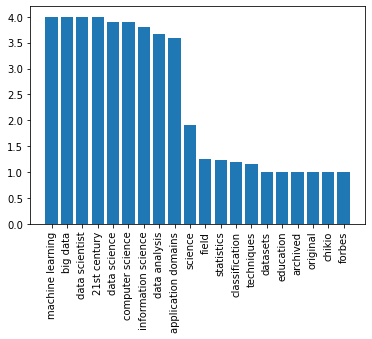

In [67]:
import matplotlib.pyplot as plt

def plot(pair_list):
    k,v = zip(*pair_list)
    plt.bar(range(len(k)),v)
    plt.xticks(range(len(k)),k,rotation='vertical')
    plt.show()

plot(res)

יש, עם זאת, דרך אפילו טובה יותר להמחיש תדירות מילים - באמצעות **ענן מילים**. נצטרך להתקין ספרייה נוספת כדי ליצור את ענן המילים מרשימת מילות המפתח שלנו.


In [71]:
!{sys.executable} -m pip install wordcloud

אובייקט `WordCloud` אחראי על קבלת טקסט מקורי או רשימה מחושבת מראש של מילים עם התדירויות שלהן, ומחזיר תמונה שניתן להציג באמצעות `matplotlib`:


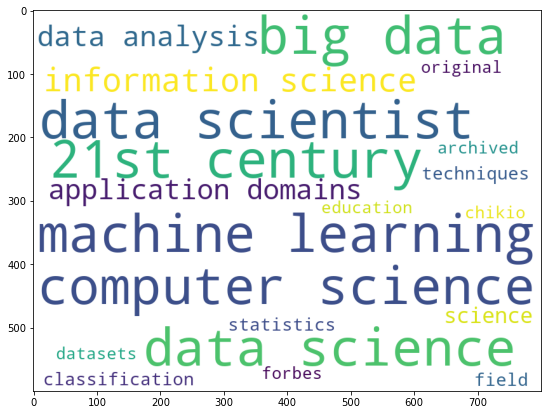

In [69]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(background_color='white',width=800,height=600)
plt.figure(figsize=(15,7))
plt.imshow(wc.generate_from_frequencies({ k:v for k,v in res }))

אנחנו יכולים גם להעביר את הטקסט המקורי ל-`WordCloud` - בואו נראה אם אנחנו מצליחים לקבל תוצאה דומה:


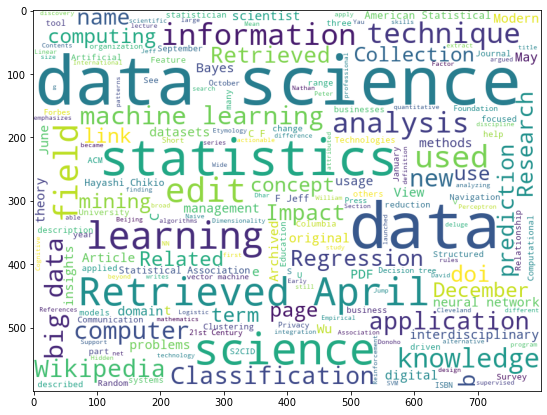

In [70]:
plt.figure(figsize=(15,7))
plt.imshow(wc.generate(text))

In [61]:
wc.generate(text).to_file('images/ds_wordcloud.png')

ניתן לראות שהענן מילים נראה עכשיו מרשים יותר, אבל הוא גם מכיל הרבה רעש (לדוגמה, מילים לא קשורות כמו `Retrieved on`). בנוסף, אנחנו מקבלים פחות מילות מפתח שמורכבות משתי מילים, כמו *data scientist* או *computer science*. הסיבה לכך היא שאלגוריתם RAKE עושה עבודה טובה יותר בבחירת מילות מפתח איכותיות מתוך הטקסט. הדוגמה הזו ממחישה את החשיבות של עיבוד וניקוי נתונים, מכיוון שתמונה ברורה בסוף תאפשר לנו לקבל החלטות טובות יותר.

בתרגיל הזה עברנו תהליך פשוט של חילוץ משמעות מטקסט של ויקיפדיה, בצורה של מילות מפתח וענן מילים. הדוגמה הזו די פשוטה, אבל היא מדגימה היטב את כל השלבים הטיפוסיים שמדען נתונים עובר בעבודה עם נתונים, החל מרכישת הנתונים ועד ויזואליזציה.

בקורס שלנו נדון בכל השלבים הללו בפירוט.



---

**כתב ויתור**:  
מסמך זה תורגם באמצעות שירות תרגום מבוסס בינה מלאכותית [Co-op Translator](https://github.com/Azure/co-op-translator). למרות שאנו שואפים לדיוק, יש לקחת בחשבון שתרגומים אוטומטיים עשויים להכיל שגיאות או אי דיוקים. המסמך המקורי בשפתו המקורית צריך להיחשב כמקור סמכותי. עבור מידע קריטי, מומלץ להשתמש בתרגום מקצועי על ידי אדם. איננו נושאים באחריות לאי הבנות או לפרשנויות שגויות הנובעות משימוש בתרגום זה.
